In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df_heart = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [3]:
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df_heart.shape

(918, 12)

In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df_eda = df_heart.copy()
df_eda = pd.get_dummies(df_eda, drop_first=True)

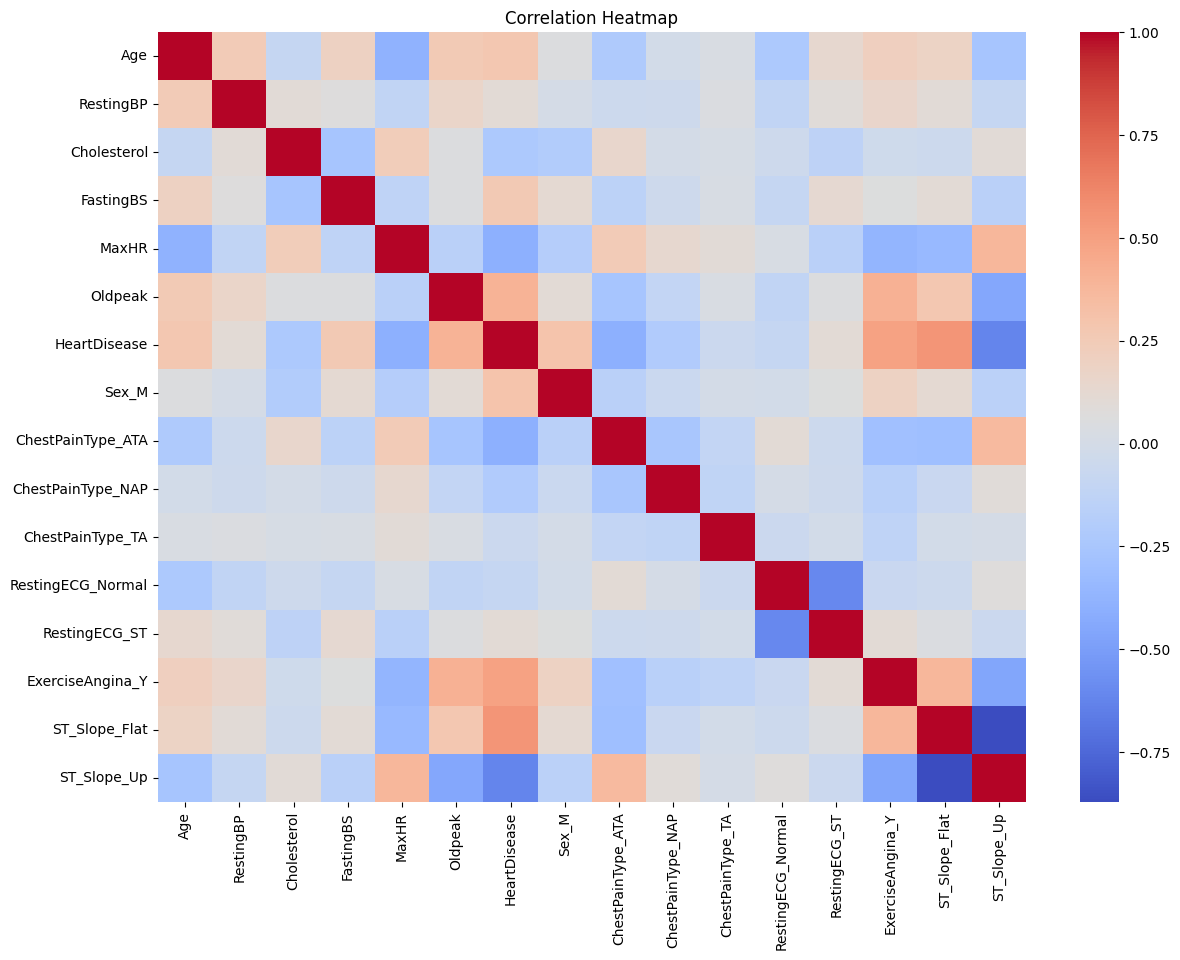

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df_eda.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
df_heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df_heart.duplicated().sum()

np.int64(0)

In [11]:
df_heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [12]:
df_heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

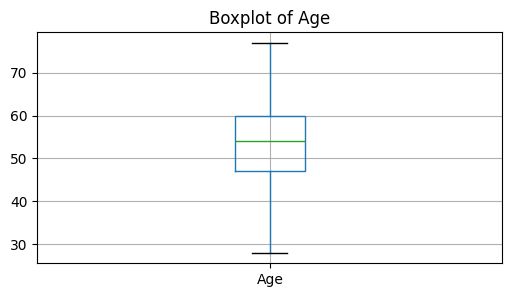

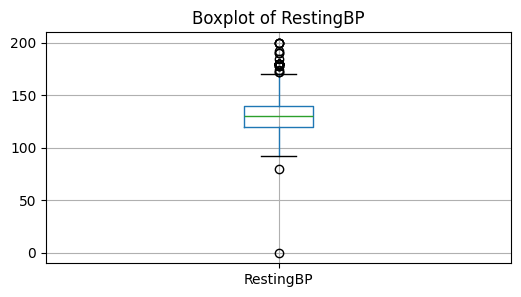

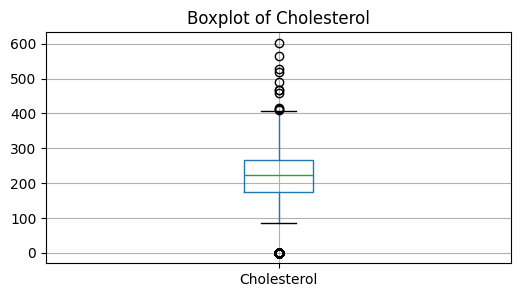

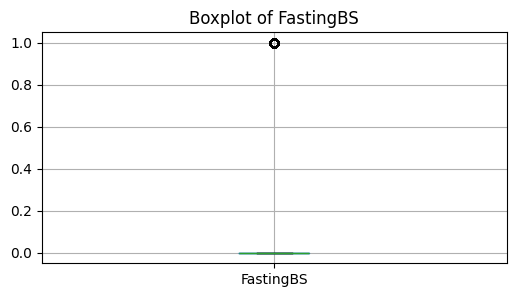

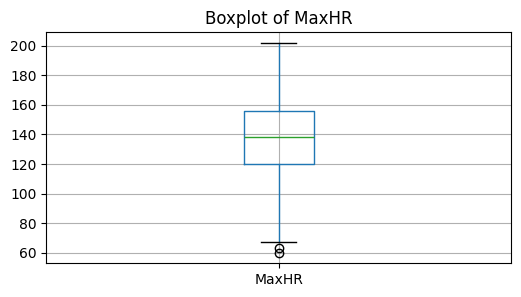

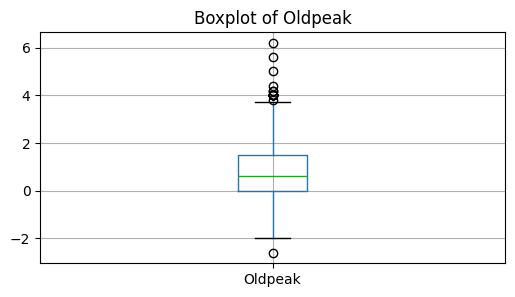

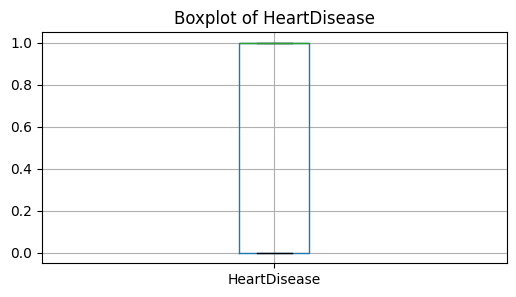

In [13]:
import matplotlib.pyplot as plt

numeric_cols = df_heart.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    df_heart.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [14]:
def remove_outliers_all_columns(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df_clean = df.copy()
    
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

df_heart_no_outliers = remove_outliers_all_columns(df_heart)
print(f"Original shape: {df_heart.shape}")
print(f"After removing outliers: {df_heart_no_outliers.shape}")

Original shape: (918, 12)
After removing outliers: (587, 12)


In [17]:
df_heart_encoded = pd.get_dummies(df_heart_no_outliers,columns=df_heart_no_outliers.select_dtypes(include='object').columns,drop_first=True,dtype=int)

In [18]:
df_heart_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,140,241,0,123,0.2,1,0,0,0,0,1,0,1,1,0
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [19]:
df_heart_encoded.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_M                  int64
ChestPainType_ATA      int64
ChestPainType_NAP      int64
ChestPainType_TA       int64
RestingECG_Normal      int64
RestingECG_ST          int64
ExerciseAngina_Y       int64
ST_Slope_Flat          int64
ST_Slope_Up            int64
dtype: object

In [20]:
from sklearn.preprocessing import StandardScaler

X = df_heart_encoded.drop(columns=['HeartDisease'])
y = df_heart_encoded['HeartDisease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        random_state=42
    )
}

In [54]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import pandas as pd

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

    results.append({
        "Model": name,
        "Test Accuracy": acc,
        "ROC AUC": roc,
        "CV Mean Accuracy": cv_scores.mean(),
        "CV Std": cv_scores.std()
    })

In [55]:
results_df = pd.DataFrame(results)
results_df

,Model,Test Accuracy,ROC AUC,CV Mean Accuracy,CV Std
0,Random Forest,0.838983,0.914894,0.832870,0.080733
1,XGBoost,0.864407,0.901109,0.803897,0.075268
